In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import csv

In [2]:
import numpy as np
import pandas as pd



In [3]:
import datetime as dt



# Reflect Tables into SQLAlchemy ORM




In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect



In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

# Create a connection to the engine called `conn`
conn = engine.connect()


In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)



In [7]:
# We can view all of the classes that automap found
Base.classes.keys()


['measurement', 'station']

In [8]:
# Create the inspector and connect it to the engine
inspector = inspect(engine)

# Collect the names of tables within the database
inspector.get_table_names()


['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station



In [10]:
# Use `engine.execute` to select and display the first 10 rows from the table
engine.execute('SELECT * FROM measurement LIMIT 10').fetchall()



[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0)]

In [11]:
Measurements = pd.read_sql("SELECT * FROM Measurement", conn)
Measurements.head(10)



,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0
5,6,USC00519397,2010-01-07,0.06,70.0
6,7,USC00519397,2010-01-08,0.00,64.0
7,8,USC00519397,2010-01-09,0.00,68.0
8,9,USC00519397,2010-01-10,0.00,73.0
9,10,USC00519397,2010-01-11,0.01,64.0


In [12]:
Measurements.describe()


,id,prcp,tobs
count,19550.000000,18103.000000,19550.000000
mean,9775.500000,0.160644,73.097954
std,5643.743217,0.468746,4.523527
min,1.000000,0.000000,53.000000
25%,4888.250000,0.000000,70.000000
50%,9775.500000,0.010000,73.000000
75%,14662.750000,0.110000,76.000000
max,19550.000000,11.530000,87.000000


In [13]:
Stations = pd.read_sql("SELECT * FROM Measurement", conn)
Stations .head()



,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


In [14]:
Stations.describe()



,id,prcp,tobs
count,19550.000000,18103.000000,19550.000000
mean,9775.500000,0.160644,73.097954
std,5643.743217,0.468746,4.523527
min,1.000000,0.000000,53.000000
25%,4888.250000,0.000000,70.000000
50%,9775.500000,0.010000,73.000000
75%,14662.750000,0.110000,76.000000
max,19550.000000,11.530000,87.000000


In [15]:
# Create our session (link) from Python to the DB
session = Session(engine)



# Exploratory Climate Analysis




In [16]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [17]:
# Calculate the date 1 year ago from the last data point in the database

# Grabs the last date entry in the data table
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(last_date)




('2017-08-23',)


In [18]:
# to get date of 12 monthes ago from the date of 2017-08-23
last_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(last_year)



2016-08-23


In [19]:
# query to pull the last year of precipitation data
rain = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > last_year).\
    order_by(Measurement.date).all()
#rain

# Load the data from the query into a dataframe
rain_df = pd.DataFrame(rain)
rain_df.head()



,date,prcp
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22


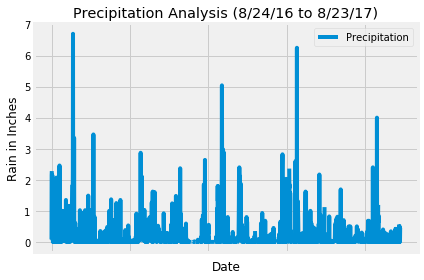

<Figure size 432x288 with 0 Axes>

In [20]:
# plot the dataframe
rain_df.plot('date', 'prcp')
plt.xlabel("Date")
plt.ylabel("Rain in Inches")
plt.title("Precipitation Analysis (8/24/16 to 8/23/17)")
plt.legend(["Precipitation"])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show() 
plt.savefig("Images/Precipitation Analysis.png")




In [21]:
# Use Pandas to calcualte the summary statistics for the precipitation data

rain_df.describe()


,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [22]:
# Design a query to show how many stations are available in this dataset?
station_counts=session.query(Measurement).group_by(Measurement.station).count()

#print(station_counts)
print("There are {} stations available in this dataset.".format(station_counts))



There are 9 stations available in this dataset.


In [23]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
busy_station = session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station).\
order_by(func.count(Measurement.tobs).desc()).all()
busiest_station=busy_station[0][0]
#print(busiest_station)

print("Here are all of the Stations (in descending order) with their number of observations:")
for station, count in busy_station:
     print("Station",station,"had",count, "weather observations.")
                                                                                                                   

Here are all of the Stations (in descending order) with their number of observations:
Station USC00519281 had 2772 weather observations.
Station USC00519397 had 2724 weather observations.
Station USC00513117 had 2709 weather observations.
Station USC00519523 had 2669 weather observations.
Station USC00516128 had 2612 weather observations.
Station USC00514830 had 2202 weather observations.
Station USC00511918 had 1979 weather observations.
Station USC00517948 had 1372 weather observations.
Station USC00518838 had 511 weather observations.


In [24]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
most_active_station_temps = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs),
                                  func.avg(Measurement.tobs)).filter(Measurement.station =='USC00519281')

print(f"Most Active Station {busiest_station} Temperatures")
print(f"Low: {most_active_station_temps[0][0]} High: {most_active_station_temps[0][1]} Average: {round(most_active_station_temps[0][2], 1)}")

Most Active Station USC00519281 Temperatures
Low: 54.0 High: 85.0 Average: 71.7


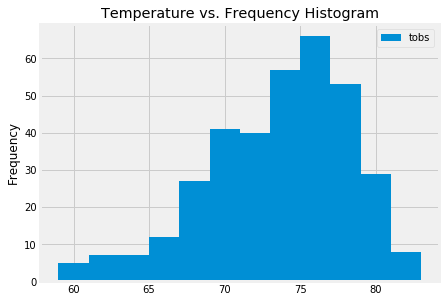

In [25]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

tempe_observations = session.query(Measurement.tobs).filter(Measurement.date >= last_year).filter(Measurement.station==
busiest_station).all()

tempe_observations_df=pd.DataFrame(tempe_observations, columns=['tobs'])

#print(tempe_observations)
tempe_observations_df.head()
# We need 12 bins since the observation is for twelve months
tempe_observations_df.plot.hist(bins=12, title="Temperature vs. Frequency Histogram")
plt.tight_layout(0)
plt.savefig("Images/Temperature vs. Frequency.png")
plt.show()


In [26]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [27]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

# calculate the min/max/avg from last year that matches my trip date
trip_arrive = dt.date(2018, 3, 6)
trip_leave = dt.date(2018, 3, 20)
last_year = dt.timedelta(days=365)
t=temp_last_year = calc_temps((trip_arrive-last_year), (trip_leave-last_year))
print(t)

[(62.0, 71.04301075268818, 82.0)]


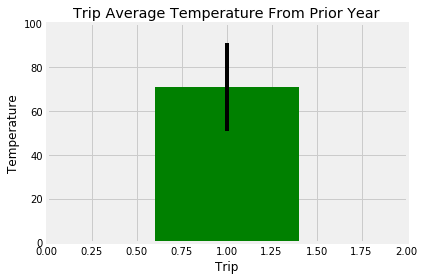

In [28]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

# plot the calculated min/max/avg from last year for the trip dates as a bar chart

avg_temp = round(t[0][1],1)
min_temp = t[0][0]
max_temp = t[0][2]
p2p = max_temp - min_temp

fig, ax = plt.subplots()
bar_chart = ax.bar(1 , avg_temp, color= 'green', yerr=p2p)
ax.set_xlabel("Trip")
ax.set_ylabel("Temperature")
ax.set_title("Trip Average Temperature From Prior Year")


# label the bars         
plt.ylim(0, 100)
plt.xlim(0,2)
fig.tight_layout()
plt.savefig("Images/Trip Average Temperature From Prior Year.png")
plt.show()


In [42]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# set the trip variables of arrive and leave for prior year
last_year_arrive = trip_arrive - last_year
last_year_leave = trip_leave - last_year
print(last_year_arrive)
print(last_year_leave)

# query to pull the rain fall from last year matching this years trip
rainfall_per_station_lastyear = session.query(Measurement.station, func.sum(Measurement.prcp)).\
    filter(Measurement.date >= last_year_arrive).\
    filter(Measurement.date <= last_year_leave).\
    group_by(Measurement.station).\
    order_by(func.sum(Measurement.prcp).desc()).all()


rainfall_per_station_lastyear

# load the query results into a dataframe and pivot on station
df=rainfall_per_station_lastyear_df=pd.DataFrame(rainfall_per_station_lastyear, columns=['station','prec'])
df.head()
rainfall_per_station=pd.pivot_table(rainfall_per_station_lastyear_df,index=['station'],values=['prec'], aggfunc=sum)
rainfall_per_station
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



2017-03-06
2017-03-20


,prec
station,
USC00513117,1.66
USC00514830,0.69
USC00516128,0.01
USC00517948,0.06
USC00519281,0.92
USC00519397,0.00
USC00519523,0.35


In [43]:
#Start Flask application
from flask import Flask, jsonify
app = Flask(__name__)



## Optional Challenge Assignment

In [44]:
# A quick landing page for links

@app.route("/")
def links():
    return (
        "List of API calls for this website!</br>"
        "/api.v1.0/precipitation</br>"
        "/api/v1.0/stations</br>"
        "/api/v1.0/tobs</br>"
        "/api/v1.0/'start date as YYYY-MM-DD'</br>"
        "/api/v1.0/'start date as YYYY-MM-DD'/'end date as YYYY-MM-DD'</br>"
    )

if __name__ == '__main__':
    app.run(debug=True)



 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
 * Restarting with stat


SystemExit: 1

/Users/asun/anaconda3/envs/PythonData3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3275: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
